# Season End Superlatives

Something that I always wish Sleeper did was a recap at the end of a regular season of the previous 15 weeks. For more than a quarter of the year, our whole league has to remember to check an app, keep up on the news, and make decisions about who to sit, who to play, which waivers wire claims to put in, what trades to propose/accept/reject, etc. and then all of a sudden its playoff time. While signing the world's most mediocre T-shirt is reward enough, I feel like the rest of the league members need something to help them feel like their league mattered. With the benefit of hindsight, who drafted the best? Who played the waiver wire the best? Who made the best trades? Who managed their team best over the course of the league? Who got statistically lucky/unlucky? Well, who needs highly paid app developers when we can just do this ourselves.

Using the power of the Sleeper API, we can pull raw data about our league directly from the Sleeper servers, and with a little python magic, we can build this kind of functionality for ourselves!

## Imports block

Starting of course with the required imports block...

In [1]:
# Begin imports

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# End Imports

## Get our Data

In a separate notebook (or notebooks), we've interfaced with the Sleeper API to download the information about our league, make it a little more human readable, and export it into dataframes which we can work with locally (so as to avoid hammering the sleeper API 1000s of times). Below we import those dataframes (saved as csv files) and take a peek to remind ourselves what they look like

In [2]:
# Begin external data import
draft_df = pd.read_csv("../data/processed/draft_with_stats.csv", index_col = 0)

# End external data import

# The Draft

It's often said that you don't win a league by winning your draft...but what does it mean to "win" a draft? While some leagues and apps (Yahooo for example) give you a 'draft grade' immediately after the draft based on their projections, ultimately this is a question that I think it's only possible to answer at the end of the year when the dust has settled. With the benefit of hindsight, we can tell quantifiably which players delivered on their expectations, which players rose above their draft stations, and which picks were (objectively speaking) wasted.  

But how should we accomplish this feat? Well, first let's do some thinkology

### Metric development

In the name of keeping things simple, we can rank players by their total fantasy stats (within their positions) and then compare them to where they were drafted, assigning positive or negative points. For instance, Austin Ekeler finished the fantasy regular season as the 2nd best RB, but was drafted as the 4th RB - giving me 2pts. Jonathan Taylor was drafted to be the best running back, but finished the season as the 21st best RB, giving Matthew -20 pts.

By this metric how do we all compare?

## Best Pick of the Draft (Overall)
The best pick at the end of the regular season turned out to be none other than Jamaal Williams. Andy picked Jamaal up with the 159th pick overall, making Jamaal Williams the 50th running back off the board.  Jamaal would end up finishing as the RB11 in our league - a difference of +39!

In [3]:
draft_df.sort_values("delta_pick", ascending = False)[:1] 

,pick_no,round,picked_by,player_display_name,sleeper_id,league_score,position_y,positional_rank,positional_pick,delta_pick
158,159,12,andyhan4,Jamaal Williams,4149.0,169.800001,RB,13.0,50.0,37.0


## Best Picks of the Draft (Positions)

### Best RB of the Draft

In [67]:
draft_df.loc[draft_df.position_y == "RB"].sort_values("delta_pick", ascending = False)[:3] 

,pick_no,round,picked_by,player_display_name,sleeper_id,league_score,position_y,positional_rank,positional_pick,delta_pick
158,159,12,andyhan4,Jamaal Williams,4149.0,169.800001,RB,13.0,50.0,37.0
88,89,7,anahan,Tony Pollard,5967.0,203.800002,RB,7.0,33.0,26.0
174,175,13,jakesmyth,Jerick McKinnon,2161.0,98.100001,RB,33.0,57.0,24.0


### Best WR of the Draft

In [68]:
draft_df.loc[draft_df.position_y == "WR"].sort_values("delta_pick", ascending = False)[:3] 

,pick_no,round,picked_by,player_display_name,sleeper_id,league_score,position_y,positional_rank,positional_pick,delta_pick
191,192,14,anahan,Josh Palmer,7670.0,114.400001,WR,33.0,69.0,36.0
107,108,8,anahan,Tyler Lockett,2374.0,170.100001,WR,8.0,43.0,35.0
184,185,14,emilyhan,Christian Watson,8167.0,113.400001,WR,34.0,65.0,31.0


### Best TE of the Draft

In [69]:
draft_df.loc[draft_df.position_y == "TE"].sort_values("delta_pick", ascending = False)[:3] 

,pick_no,round,picked_by,player_display_name,sleeper_id,league_score,position_y,positional_rank,positional_pick,delta_pick
163,164,12,anahan,David Njoku,4033.0,90.500001,TE,10.0,16.0,6.0
99,100,8,petenotpetey,Pat Freiermuth,7600.0,101.500001,TE,6.0,12.0,6.0
73,74,6,alexludtke,T.J. Hockenson,5844.0,123.700001,TE,3.0,7.0,4.0


### Best QB of the Draft

In [70]:
draft_df.loc[draft_df.position_y == "QB"].sort_values("delta_pick", ascending = False)[:3]

,pick_no,round,picked_by,player_display_name,sleeper_id,league_score,position_y,positional_rank,positional_pick,delta_pick
152,153,11,petenotpetey,Justin Fields,7591.0,244.340000,QB,6.0,18.0,12.0
148,149,11,phan497,Trevor Lawrence,7523.0,233.879997,QB,8.0,17.0,9.0
68,69,5,petenotpetey,Jalen Hurts,6904.0,328.879998,QB,1.0,7.0,6.0


## Worst Pick of the Draft (Overall)

Ok, so this one is going to be controversial, but the worst pick of the draft is technically Jameson Williams - the 60th WR off of the board - the rookie started on the PUP list and only returned to action in week 13...when he put up 0.00 pts after failing to catch his only target. The second worst pick is Kenny Golladay who only missed 5 games this season

In [8]:
draft_df.sort_values("delta_pick", ascending = True)[:12] 

,pick_no,round,picked_by,player_display_name,sleeper_id,league_score,position_y,positional_rank,positional_pick,delta_pick
189,190,14,jakesmyth,Kenny Golladay,4131.0,7.100000,WR,166.0,67.0,-99.0
168,169,13,mattlatham,Jameson Williams,8148.0,10.600000,WR,153.0,60.0,-93.0
96,97,7,petenotpetey,Hunter Renfrow,5955.0,24.700000,WR,128.0,38.0,-90.0
115,116,9,carlogesualdo,Kadarius Toney,7606.0,22.500000,WR,130.0,47.0,-83.0
61,62,5,julesdefwatchesftbll,Michael Thomas,3199.0,43.100000,WR,100.0,25.0,-75.0
150,151,11,alexludtke,Albert Okwuegbunam,6843.0,8.500000,TE,84.0,15.0,-69.0
120,121,9,phan497,Isaiah Spiller,8153.0,6.900000,RB,109.0,44.0,-65.0
123,124,9,emilyhan,Skyy Moore,8168.0,31.400000,WR,114.0,50.0,-64.0
83,84,6,mattlatham,Rashod Bateman,7571.0,45.000000,WR,96.0,33.0,-63.0
21,22,2,jakesmyth,Javonte Williams,7588.0,33.000000,RB,72.0,13.0,-59.0


## Worst Picks of the Draft (Positions)

### Worst RB of the Draft

In [9]:
draft_df.loc[draft_df.position_y == "RB"].sort_values("delta_pick", ascending = True)[:12] 

,pick_no,round,picked_by,player_display_name,sleeper_id,league_score,position_y,positional_rank,positional_pick,delta_pick
120,121,9,phan497,Isaiah Spiller,8153.0,6.900000,RB,109.0,44.0,-65.0
21,22,2,jakesmyth,Javonte Williams,7588.0,33.000000,RB,72.0,13.0,-59.0
186,187,14,andyhan4,Ronald Jones,5052.0,3.900000,RB,117.0,59.0,-58.0
170,171,13,ujthechamp,Zamir White,8139.0,6.200000,RB,114.0,56.0,-58.0
55,56,4,mattlatham,Elijah Mitchell,7561.0,24.600000,RB,81.0,25.0,-56.0
47,48,4,phan497,J.K. Dobbins,6806.0,49.200000,RB,56.0,22.0,-34.0
35,36,3,llatham65,Cam Akers,6938.0,59.500001,RB,52.0,18.0,-34.0
77,78,6,jakesmyth,Chase Edmonds,5000.0,46.600000,RB,58.0,30.0,-28.0
0,1,1,mattlatham,Jonathan Taylor,6813.0,127.600001,RB,22.0,1.0,-21.0
94,95,7,alexludtke,Rashaad Penny,4985.0,49.200001,RB,55.0,35.0,-20.0


### Worst WR of the Draft

In [10]:
draft_df.loc[draft_df.position_y == "WR"].sort_values("delta_pick", ascending = True)[:12] 

,pick_no,round,picked_by,player_display_name,sleeper_id,league_score,position_y,positional_rank,positional_pick,delta_pick
189,190,14,jakesmyth,Kenny Golladay,4131.0,7.100000,WR,166.0,67.0,-99.0
168,169,13,mattlatham,Jameson Williams,8148.0,10.600000,WR,153.0,60.0,-93.0
96,97,7,petenotpetey,Hunter Renfrow,5955.0,24.700000,WR,128.0,38.0,-90.0
115,116,9,carlogesualdo,Kadarius Toney,7606.0,22.500000,WR,130.0,47.0,-83.0
61,62,5,julesdefwatchesftbll,Michael Thomas,3199.0,43.100000,WR,100.0,25.0,-75.0
123,124,9,emilyhan,Skyy Moore,8168.0,31.400000,WR,114.0,50.0,-64.0
83,84,6,mattlatham,Rashod Bateman,7571.0,45.000000,WR,96.0,33.0,-63.0
28,29,3,mattlatham,Keenan Allen,1479.0,66.000001,WR,70.0,11.0,-59.0
100,101,8,emilyhan,Elijah Moore,7596.0,55.300001,WR,85.0,40.0,-45.0
57,58,5,niclath95,Allen Robinson,1992.0,68.400001,WR,66.0,23.0,-43.0


### Worst TE of the Draft

In [11]:
draft_df.loc[draft_df.position_y == "TE"].sort_values("delta_pick", ascending = True)[:12] 

,pick_no,round,picked_by,player_display_name,sleeper_id,league_score,position_y,positional_rank,positional_pick,delta_pick
150,151,11,alexludtke,Albert Okwuegbunam,6843.0,8.500000,TE,84.0,15.0,-69.0
51,52,4,anahan,Darren Waller,2505.0,31.500000,TE,42.0,6.0,-36.0
37,38,3,andyhan4,Kyle Pitts,7553.0,61.600001,TE,26.0,4.0,-22.0
169,170,13,niclath95,Irv Smith,6126.0,38.800000,TE,37.0,17.0,-20.0
84,85,7,mattlatham,Mike Gesicki,4993.0,62.900000,TE,24.0,10.0,-14.0
42,43,4,lauramarkey,Dalton Schultz,5001.0,78.500001,TE,15.0,5.0,-10.0
81,82,6,ujthechamp,Dawson Knox,5906.0,73.300001,TE,17.0,9.0,-8.0
142,143,11,ujthechamp,Hunter Henry,3214.0,66.600001,TE,20.0,14.0,-6.0
29,30,3,niclath95,George Kittle,4217.0,92.000001,TE,8.0,3.0,-5.0
183,184,14,petenotpetey,Robert Tonyan,4602.0,65.700001,TE,21.0,19.0,-2.0


### Worst QB of the Draft

In [12]:
draft_df.loc[draft_df.position_y == "QB"].sort_values("delta_pick", ascending = True)[:12] 

,pick_no,round,picked_by,player_display_name,sleeper_id,league_score,position_y,positional_rank,positional_pick,delta_pick
95,96,7,emilyhan,Trey Lance,7610.0,12.460000,QB,51.0,12.0,-39.0
185,186,14,alexludtke,Deshaun Watson,4017.0,23.680000,QB,45.0,21.0,-24.0
176,177,13,phan497,Jameis Winston,2306.0,45.919999,QB,37.0,20.0,-17.0
101,102,8,alexludtke,Matthew Stafford,421.0,111.379998,QB,29.0,13.0,-16.0
93,94,7,andyhan4,Dak Prescott,3294.0,134.279998,QB,25.0,11.0,-14.0
59,60,5,carlogesualdo,Kyler Murray,5849.0,200.519999,QB,15.0,5.0,-10.0
76,77,6,llatham65,Russell Wilson,1234.0,171.299998,QB,19.0,9.0,-10.0
153,154,11,lauramarkey,Mac Jones,7527.0,115.619998,QB,28.0,19.0,-9.0
82,83,6,niclath95,Aaron Rodgers,96.0,190.259998,QB,18.0,10.0,-8.0
34,35,3,jakesmyth,Justin Herbert,6797.0,231.539997,QB,9.0,3.0,-6.0


# Overall Draft Performance by Team/Manager

Overall, the best draft of the season went to Aunt Ana - congrats!

[Text(0.5, 0, 'Average Pick Score'), Text(0, 0.5, '')]

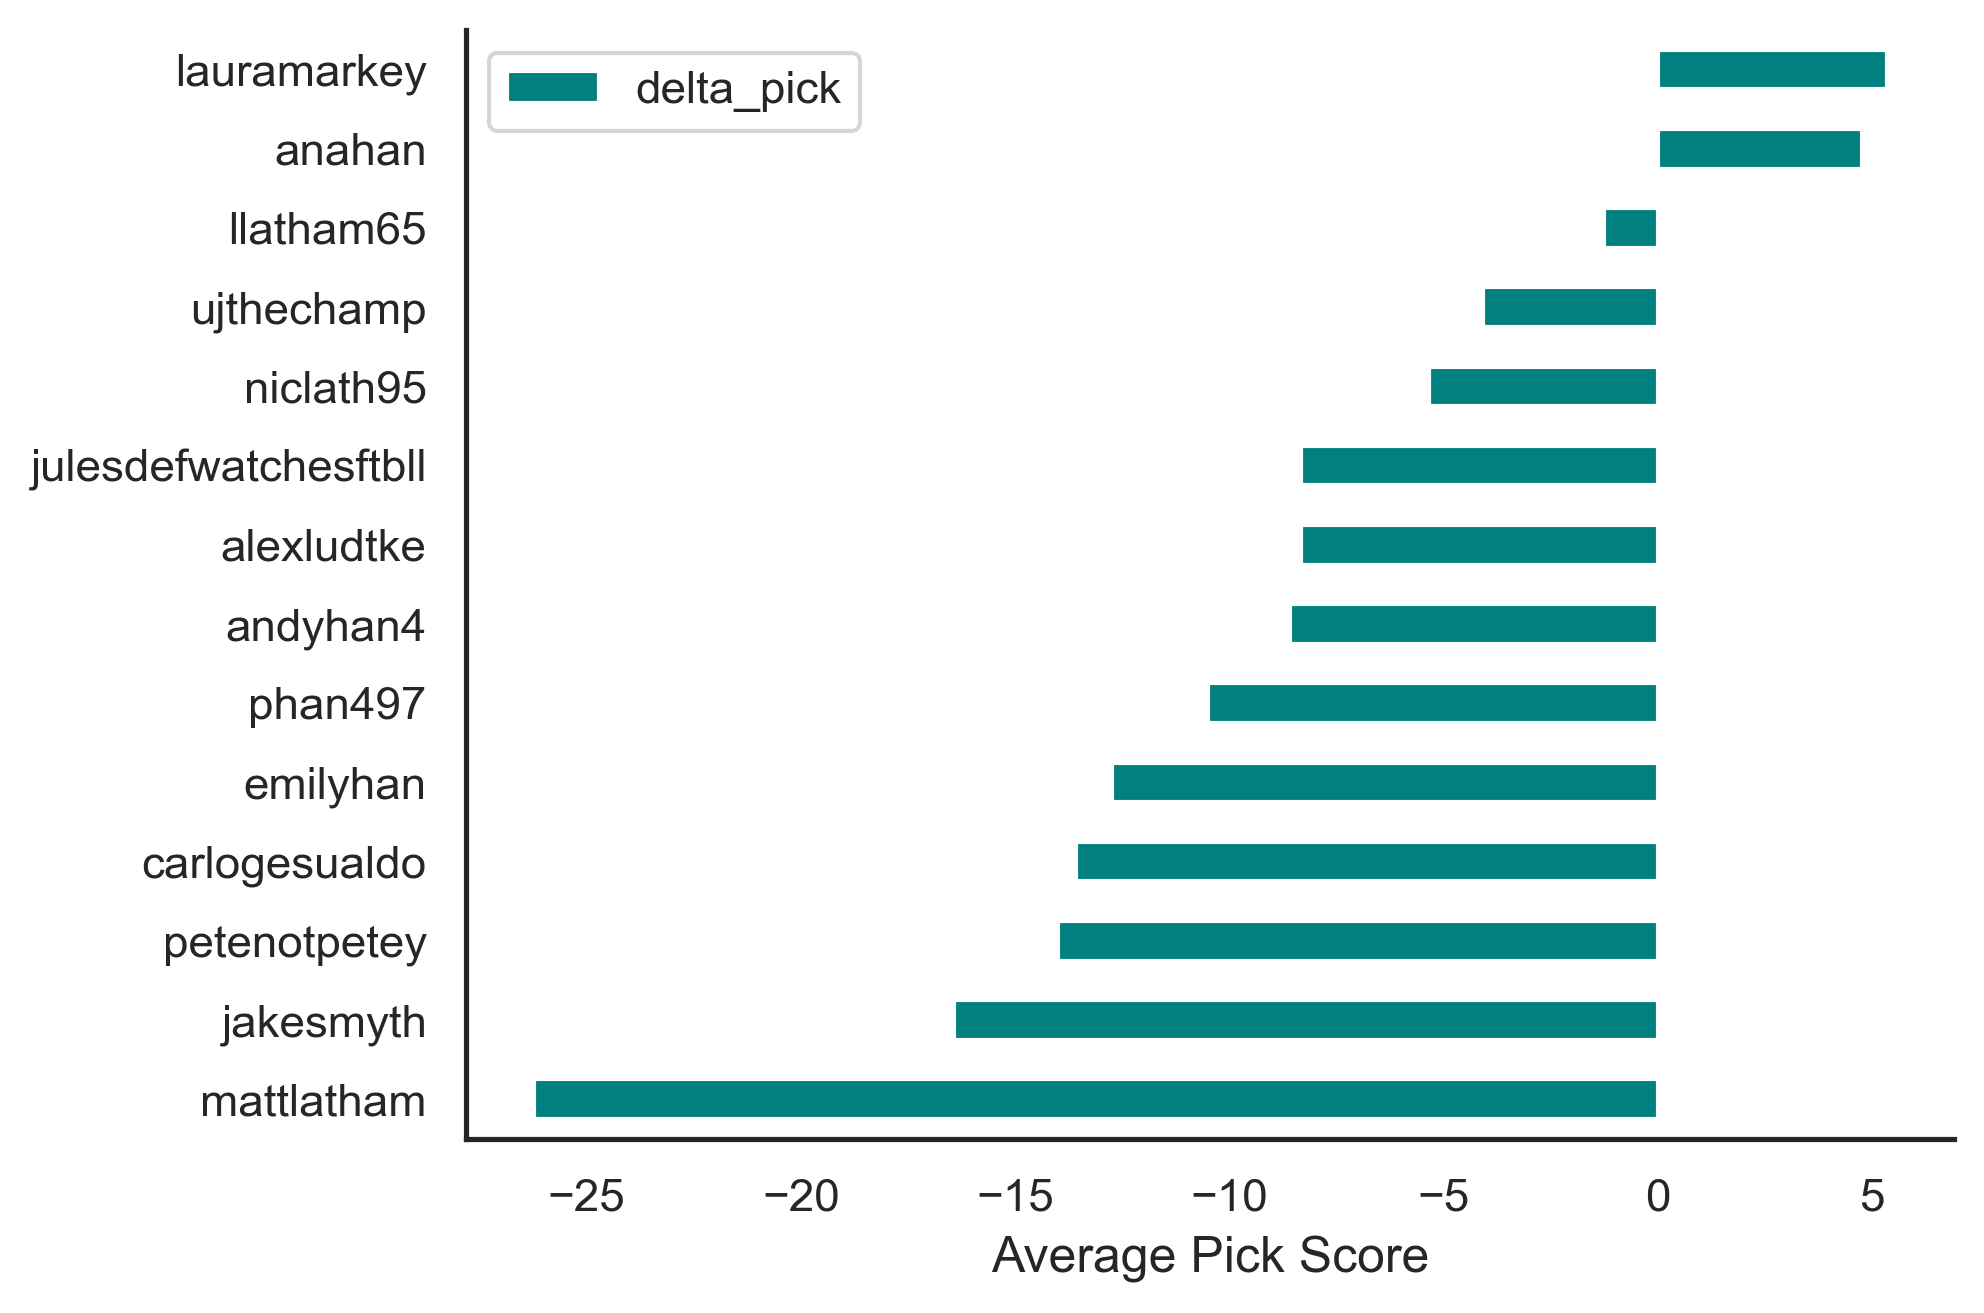

In [47]:
best_drafts_by_manager = pd.DataFrame(draft_df.groupby("picked_by")["delta_pick"].mean().sort_values(ascending = True))
fig = plt.figure(dpi = 300)
ax = best_drafts_by_manager.plot.barh(color = 'teal', ax = plt.gca())
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set(xlabel = "Average Pick Score", ylabel = "")

But summing the performance is just one way to look at things...here's the full distribution

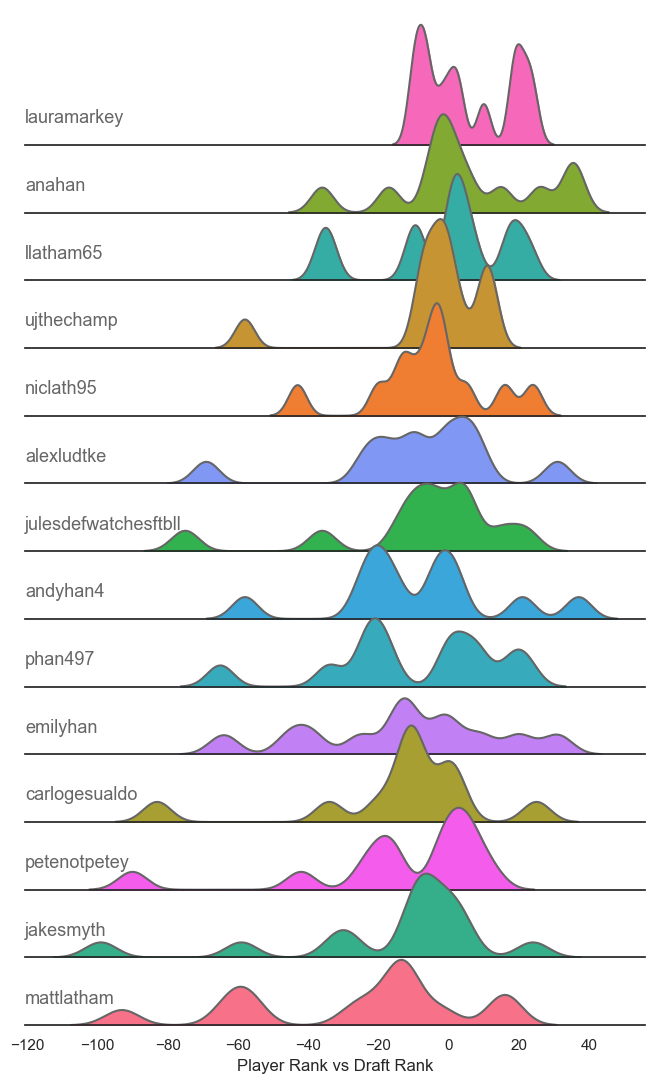

In [15]:
best_drafts_by_manager = pd.DataFrame(draft_df.groupby("picked_by")["delta_pick"].sum().sort_values(ascending = False))

sns.set_theme(style = "white", rc = {"axes.facecolor":(0,0,0,0)})
g = sns.FacetGrid(draft_df, row="picked_by", hue = "picked_by", aspect = 9, height = 0.8,
                 row_order = best_drafts_by_manager.index)
g.map_dataframe(sns.kdeplot, bw_adjust = 0.25, x = "delta_pick", fill = True, alpha = 1)
g.map_dataframe(sns.kdeplot, bw_adjust = 0.25, x = "delta_pick", color = '#666666')


def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='#666666', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "picked_by")

g.fig.subplots_adjust(hspace = -.5)
g.set_titles("")
g.set(yticks=[], xlabel = "Player Rank vs Draft Rank", ylabel="")
g.despine(left = True)

In [85]:
draft_df.loc[draft_df.picked_by == "mattlatham"].sort_values("delta_pick", ascending = False)[["round", "player_display_name", "position_y", "positional_rank", "positional_pick", "delta_pick"]][:12]

,round,player_display_name,position_y,positional_rank,positional_pick,delta_pick
56,5,Amon-Ra St. Brown,WR,6.0,22.0,16.0
195,14,Alec Pierce,WR,56.0,72.0,16.0
27,2,Josh Allen,QB,3.0,1.0,-2.0
167,12,Mark Ingram,RB,67.0,55.0,-12.0
112,9,Alexander Mattison,RB,54.0,41.0,-13.0
139,10,Michael Gallup,WR,68.0,55.0,-13.0
84,7,Mike Gesicki,TE,24.0,10.0,-14.0
0,1,Jonathan Taylor,RB,22.0,1.0,-21.0
111,8,Robert Woods,WR,72.0,45.0,-27.0
55,4,Elijah Mitchell,RB,81.0,25.0,-56.0


# Worst Pick (First 7 Rounds)

You could say that picks you make in the back half of a draft shouldn't really count against you that much, and that the failures of your starters (first 7 rounds) are much more costly.  We can look at that specifically as well...

In [71]:
draft_df.loc[draft_df["round"] <= 7].sort_values("delta_pick", ascending = True)[:3] 

,pick_no,round,picked_by,player_display_name,sleeper_id,league_score,position_y,positional_rank,positional_pick,delta_pick
96,97,7,petenotpetey,Hunter Renfrow,5955.0,24.7,WR,128.0,38.0,-90.0
61,62,5,julesdefwatchesftbll,Michael Thomas,3199.0,43.1,WR,100.0,25.0,-75.0
83,84,6,mattlatham,Rashod Bateman,7571.0,45.0,WR,96.0,33.0,-63.0


In [76]:
draft_df.loc[(draft_df.position_y == "RB") & (draft_df.positional_pick <= 35)].sort_values("delta_pick", ascending = True)[:3] 

,pick_no,round,picked_by,player_display_name,sleeper_id,league_score,position_y,positional_rank,positional_pick,delta_pick
21,22,2,jakesmyth,Javonte Williams,7588.0,33.000000,RB,72.0,13.0,-59.0
55,56,4,mattlatham,Elijah Mitchell,7561.0,24.600000,RB,81.0,25.0,-56.0
35,36,3,llatham65,Cam Akers,6938.0,59.500001,RB,52.0,18.0,-34.0


In [86]:
draft_df.loc[(draft_df.position_y == "WR") & (draft_df.positional_pick <= 35)].sort_values("delta_pick", ascending = True)[:3] 

,pick_no,round,picked_by,player_display_name,sleeper_id,league_score,position_y,positional_rank,positional_pick,delta_pick
61,62,5,julesdefwatchesftbll,Michael Thomas,3199.0,43.100000,WR,100.0,25.0,-75.0
83,84,6,mattlatham,Rashod Bateman,7571.0,45.000000,WR,96.0,33.0,-63.0
28,29,3,mattlatham,Keenan Allen,1479.0,66.000001,WR,70.0,11.0,-59.0


In [78]:
draft_df.loc[(draft_df.position_y == "TE") & (draft_df.positional_pick <= 16)].sort_values("delta_pick", ascending = True)[:3] 

,pick_no,round,picked_by,player_display_name,sleeper_id,league_score,position_y,positional_rank,positional_pick,delta_pick
150,151,11,alexludtke,Albert Okwuegbunam,6843.0,8.500000,TE,84.0,15.0,-69.0
51,52,4,anahan,Darren Waller,2505.0,31.500000,TE,42.0,6.0,-36.0
37,38,3,andyhan4,Kyle Pitts,7553.0,61.600001,TE,26.0,4.0,-22.0


In [74]:
draft_df.loc[(draft_df.position_y == "QB") & (draft_df.positional_pick <= 14)].sort_values("delta_pick", ascending = True)[:3] 

,pick_no,round,picked_by,player_display_name,sleeper_id,league_score,position_y,positional_rank,positional_pick,delta_pick
95,96,7,emilyhan,Trey Lance,7610.0,12.460000,QB,51.0,12.0,-39.0
101,102,8,alexludtke,Matthew Stafford,421.0,111.379998,QB,29.0,13.0,-16.0
93,94,7,andyhan4,Dak Prescott,3294.0,134.279998,QB,25.0,11.0,-14.0


# Waiver Wires

Next, we're going to check out some info about how players did in the waiver wires!  Note for that these purposes, we're aggretgating waiver wires and free agency acquisitions (which are technically different things...)


In [21]:
waiver_wire_df = pd.read_parquet("../data/processed/waiver_wire_summary_df.parquet").reset_index()
waiver_wire_df

,added_player_name,creator,faab_spent,points_as_starter,created,drops_named,points_as_starter_by_week,weeks_started,leg
0,Geno Smith,niclath95,1,148.72,[1663032157377],[{'Nico Collins': 'niclath95'}],"[11.68, 13.1, 19.08, 21.8, 18.2, 19.32, 22.98,...","[6, 7, 8, 9, 10, 12, 13, 14]",[1]
1,Daniel Jones,llatham65,0,130.72,"[1666175607889, 1667985974515]","[None, {'Andy Dalton': 'llatham65'}]","[28.78, 8.04, 18.28, 26.64, 13.52, 16.1, 19.36]","[7, 8, 10, 11, 12, 13, 14]","[7, 10]"
2,Buffalo Bills,ujthechamp,20,123.00,[1668047459078],[None],"[17.0, 19.0, 4.0, 7.0, 13.0, 8.0, 5.0, 6.0, 9....","[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14]",[10]
3,Jared Goff,andyhan4,0,119.08,[1663561160541],[{'Mike Davis': 'andyhan4'}],"[14.88, 34.22, 1.52, 18.14, 12.38, 13.84, 6.5,...","[3, 4, 7, 8, 9, 10, 11, 12]",[2]
4,Philadelphia Eagles,jakesmyth,3,115.00,[1663677789004],[{'Cincinnati Bengals': 'jakesmyth'}],"[20.0, 18.0, 4.0, 7.0, 16.0, 8.0, 8.0, 8.0, 6....","[3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14]",[2]
...,...,...,...,...,...,...,...,...,...
259,Nico Collins,phan497,0,0.00,[1668873493846],[{'Kyren Williams': 'phan497'}],[],[],[11]
260,DJ Chark,llatham65,0,0.00,[1666176267526],[None],[],[],[7]
261,Joshua Kelley,carlogesualdo,0,0.00,"[1665697183190, 1666812863435]","[{'Craig Reynolds': 'carlogesualdo'}, None]",[],[],"[6, 8]"
262,Minnesota Vikings,alexludtke,0,-1.00,[1670573254983],[{'New York Jets': 'alexludtke'}],[-1.0],[14],[14]


## Waiver Wire Winners

First, we're going to look at the winners of the waiver wire overall by looking at the points that an added player contributed to the team over the course of the entire season. Note that we're only counting points as a starter.  The overall best waiver wire pickup (by number of points contributed as a starter is...

In [22]:
waiver_wire_df.sort_values(by = "points_as_starter", ascending = False)[:1]

,added_player_name,creator,faab_spent,points_as_starter,created,drops_named,points_as_starter_by_week,weeks_started,leg
0,Geno Smith,niclath95,1,148.72,[1663032157377],[{'Nico Collins': 'niclath95'}],"[11.68, 13.1, 19.08, 21.8, 18.2, 19.32, 22.98,...","[6, 7, 8, 9, 10, 12, 13, 14]",[1]


Nicole got some pretty darn good value out of Geno Smith, having started him 7 weeks after picking him up for a single dollar - not too shabby!  Let's look at the top 10 waiver wire picks

In [23]:
waiver_wire_df.sort_values(by = "points_as_starter", ascending = False)[:10]

,added_player_name,creator,faab_spent,points_as_starter,created,drops_named,points_as_starter_by_week,weeks_started,leg
0,Geno Smith,niclath95,1,148.72,[1663032157377],[{'Nico Collins': 'niclath95'}],"[11.68, 13.1, 19.08, 21.8, 18.2, 19.32, 22.98,...","[6, 7, 8, 9, 10, 12, 13, 14]",[1]
1,Daniel Jones,llatham65,0,130.72,"[1666175607889, 1667985974515]","[None, {'Andy Dalton': 'llatham65'}]","[28.78, 8.04, 18.28, 26.64, 13.52, 16.1, 19.36]","[7, 8, 10, 11, 12, 13, 14]","[7, 10]"
2,Buffalo Bills,ujthechamp,20,123.00,[1668047459078],[None],"[17.0, 19.0, 4.0, 7.0, 13.0, 8.0, 5.0, 6.0, 9....","[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14]",[10]
3,Jared Goff,andyhan4,0,119.08,[1663561160541],[{'Mike Davis': 'andyhan4'}],"[14.88, 34.22, 1.52, 18.14, 12.38, 13.84, 6.5,...","[3, 4, 7, 8, 9, 10, 11, 12]",[2]
4,Philadelphia Eagles,jakesmyth,3,115.00,[1663677789004],[{'Cincinnati Bengals': 'jakesmyth'}],"[20.0, 18.0, 4.0, 7.0, 16.0, 8.0, 8.0, 8.0, 6....","[3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14]",[2]
5,Jeff Wilson,mattlatham,61,108.00,"[1663085811968, 1667331413754]","[{'Justice Hill': 'mattlatham'}, {'Justice Hil...","[11.3, 9.1, 13.4, 19.7, -0.5, 5.4, 14.7, 21.3,...","[2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 14]","[1, 8]"
6,Gerald Everett,jakesmyth,0,87.00,[1662599571992],[{'Jerick McKinnon': 'jakesmyth'}],"[12.9, 10.1, 3.5, 14.6, 0.7, 5.4, 8.8, 6.1, 3....","[1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 14]",[1]
7,Baltimore Ravens,carlogesualdo,0,86.00,"[1665689791992, 1668372758269]","[{'Jacksonville Jaguars': 'carlogesualdo'}, None]","[13.0, 7.0, 13.0, 7.0, 15.0, 18.0, 7.0, 6.0]","[1, 2, 3, 6, 7, 11, 12, 13]","[6, 10]"
8,Tyler Bass,petenotpetey,0,77.00,[1666785289748],[{'Ryan Succop': 'petenotpetey'}],"[10.0, 6.0, 13.0, 23.0, 9.0, 7.0, 9.0]","[8, 9, 10, 11, 12, 13, 14]",[8]
9,DK Metcalf,petenotpetey,26,75.10,[1666921297590],[{'Isaiah McKenzie': 'petenotpetey'}],"[12.2, 10.1, 14.5, 22.7, 15.6]","[9, 10, 12, 13, 14]",[8]


As you might expect, quarterbacks dominate the top 3, however there are some pretty interesting exceptions. For one, ujthechamp drafted the Bills, dropped them, and then picked them back up to the tune of \$20...which is a weird way of breaking the system...

Jeff Wilson comes out as a pretty amazing pickup for Matt, contributing over 100 points to his team over the season, and starting 10 different weeks. Interestingly, he was dropped and then picked back up, costing Matt 50 and 11 dollars for either pick up.

# Waiver Wire Wisperer

Ok, so who depended the most on the waiver wire for points?

In [87]:
waiver_wire_df.groupby("creator").agg({"points_as_starter" : "sum"})

,points_as_starter
creator,
alexludtke,215.92
anahan,235.20
andyhan4,377.26
carlogesualdo,414.50
emilyhan,102.72
jakesmyth,403.00
julesdefwatchesftbll,297.08
lauramarkey,236.38
llatham65,517.92


[Text(0.5, 0, 'Total Points by Waiver-Wire Pick-Ups'), Text(0, 0.5, '')]

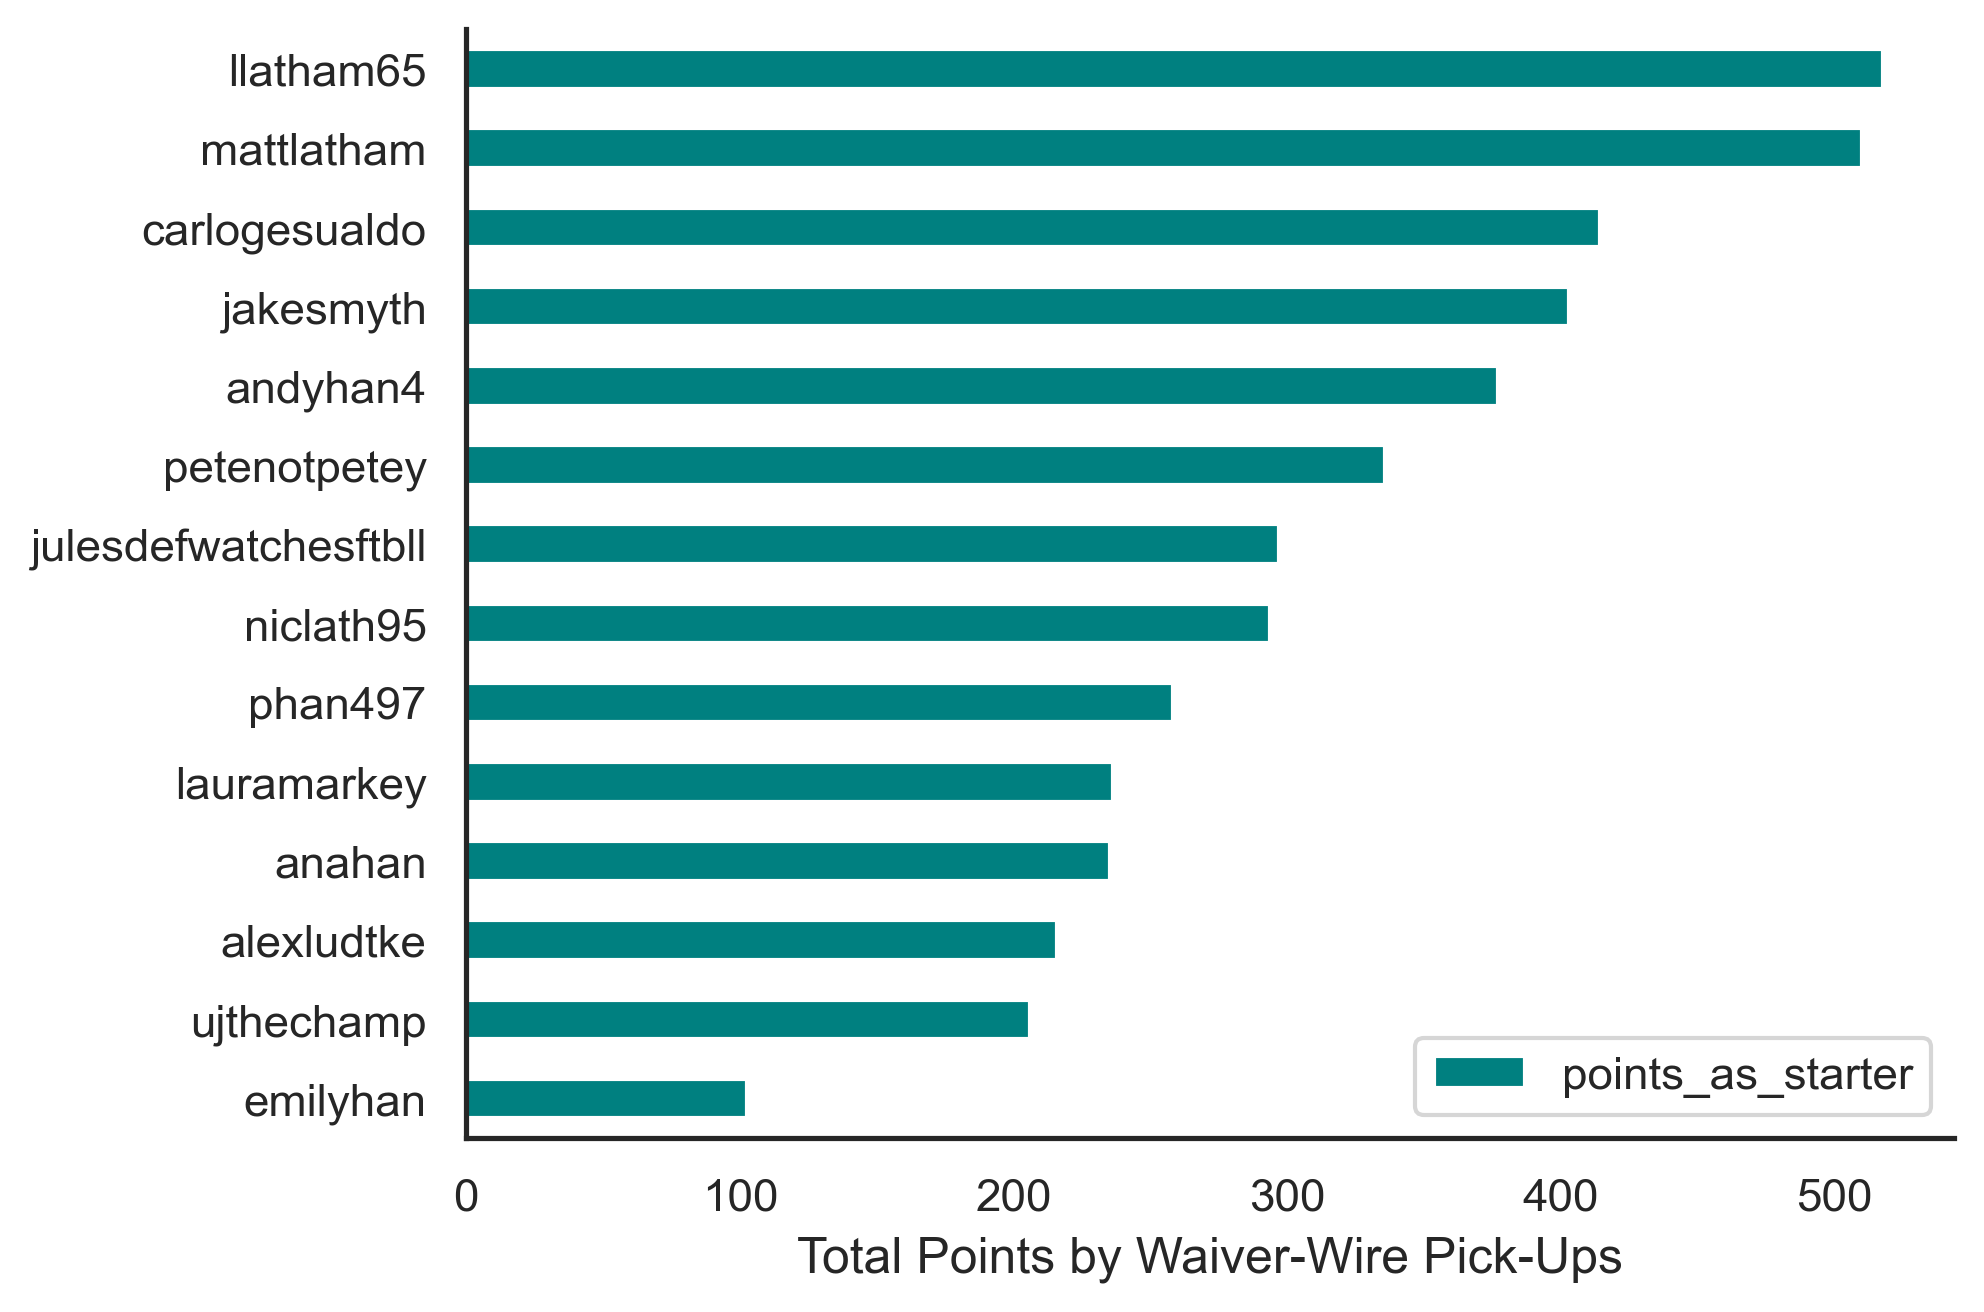

In [50]:
fig = plt.figure(dpi = 300)

ax = waiver_wire_df.groupby("creator").agg({"points_as_starter" : "sum"}).sort_values(
    by = "points_as_starter", ascending = True).plot.barh(
    color = 'teal', ax = plt.gca())

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set(xlabel = "Total Points by Waiver-Wire Pick-Ups", ylabel = "")

In [99]:
waiver_wire_df.loc[waiver_wire_df["creator"] == "emilyhan"].sort_values(
    by = "points_as_starter", ascending = False)

,added_player_name,creator,faab_spent,points_as_starter,created,drops_named,points_as_starter_by_week,weeks_started,leg,points_per_faab,max_pts_single_week,min_pts_single_week
31,Russell Wilson,emilyhan,0,44.22,[1665630108783],[{'Christian Watson': 'emilyhan'}],"[13.82, 12.24, 10.68, 7.48]","[6, 10, 11, 12]",[6],inf,13.82,7.48
67,Allen Robinson,emilyhan,0,23.00,[1667750954937],[{'Skyy Moore': 'emilyhan'}],"[3.9, 6.4, 12.7]","[9, 10, 11]",[9],inf,12.70,3.90
71,DJ Chark,emilyhan,12,18.40,[1670383588940],[{'Mark Ingram': 'emilyhan'}],[18.4],[14],[13],1.533333,18.40,18.40
127,Mark Ingram,emilyhan,0,7.80,[1663515560520],[None],"[4.1, 3.7]","[2, 7]",[2],inf,4.10,3.70
129,Cade Otton,emilyhan,0,7.30,[1666829358084],[None],"[2.5, 4.8]","[8, 14]",[8],inf,4.80,2.50
138,Jason Myers,emilyhan,0,6.00,[1670383445339],[{'Younghoe Koo': 'emilyhan'}],[6.0],[14],[13],inf,6.00,6.00
263,Tennessee Titans,emilyhan,0,-4.00,[1670383315777],[{'New Orleans Saints': 'emilyhan'}],[-4.0],[14],[13],-inf,-4.00,-4.00


## Most efficient use of FAAB

In [51]:
# Normalize points per faab dollar spent
waiver_wire_df['points_per_faab'] = waiver_wire_df.points_as_starter / waiver_wire_df.faab_spent

waiver_wire_df.loc[waiver_wire_df.faab_spent > 1].sort_values(by = ["points_per_faab", "faab_spent"], ascending = [False, False])[:10]

,added_player_name,creator,faab_spent,points_as_starter,created,drops_named,points_as_starter_by_week,weeks_started,leg,points_per_faab,max_pts_single_week
4,Philadelphia Eagles,jakesmyth,3,115.00,[1663677789004],[{'Cincinnati Bengals': 'jakesmyth'}],"[20.0, 18.0, 4.0, 7.0, 16.0, 8.0, 8.0, 8.0, 6....","[3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14]",[2],38.333333,20.00
20,Jerick McKinnon,alexludtke,5,54.80,[1667927787679],[{'Will Dissly': 'alexludtke'}],"[8.8, 4.1, 13.0, 28.9]","[10, 12, 13, 14]",[9],10.960000,28.90
24,Devin Duvernay,julesdefwatchesftbll,5,50.40,[1663560914777],[{'Mecole Hardman': 'julesdefwatchesftbll'}],"[9.3, 7.1, 10.3, 1.9, 5.2, 14.4, 1.0, 1.2, 0.0]","[3, 4, 5, 6, 7, 8, 9, 11, 14]",[2],10.080000,14.40
2,Buffalo Bills,ujthechamp,20,123.00,[1668047459078],[None],"[17.0, 19.0, 4.0, 7.0, 13.0, 8.0, 5.0, 6.0, 9....","[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14]",[10],6.150000,19.00
62,Treylon Burks,niclath95,6,24.00,[1669120392169],[None],"[15.0, 9.0]","[12, 13]",[11],4.000000,15.00
122,Brett Maher,anahan,2,8.00,[1668987140099],[{'Robbie Gould': 'anahan'}],"[3.0, 5.0]","[12, 13]",[11],4.000000,5.00
10,Jimmy Garoppolo,alexludtke,20,73.16,[1666123881958],[None],"[16.32, 15.9, 25.42, 13.28, 2.24]","[7, 10, 11, 12, 13]",[6],3.658000,25.42
82,Graham Gano,alexludtke,5,16.00,[1667927590906],[{'Jacksonville Jaguars': 'alexludtke'}],"[7.0, -2.0, 11.0]","[10, 11, 12]",[9],3.200000,11.00
42,Latavius Murray,petenotpetey,12,38.20,"[1664935890130, 1668736030265]","[{'Mecole Hardman': 'petenotpetey'}, None]","[15.2, 10.3, 8.1, 4.6]","[11, 12, 13, 14]","[4, 11]",3.183333,15.20
9,DK Metcalf,petenotpetey,26,75.10,[1666921297590],[{'Isaiah McKenzie': 'petenotpetey'}],"[12.2, 10.1, 14.5, 22.7, 15.6]","[9, 10, 12, 13, 14]",[8],2.888462,22.70


## Worst use of FAAB

Let's look at who wasted the most FAAB on a per transaction basis. To do this, we'll make a new column being points/faab

In [26]:
# Normalize points per faab dollar spent
waiver_wire_df['points_per_faab'] = waiver_wire_df.points_as_starter / waiver_wire_df.faab_spent

waiver_wire_df.loc[waiver_wire_df.faab_spent > 1].sort_values(by = ["points_per_faab", "faab_spent"], ascending = [True, False])[:10]

,added_player_name,creator,faab_spent,points_as_starter,created,drops_named,points_as_starter_by_week,weeks_started,leg,points_per_faab
248,Jaylen Warren,mattlatham,25,0.0,[1663125871266],[{'Alec Pierce': 'mattlatham'}],[],[],[1],0.0
240,Mike White,alexludtke,20,0.0,[1670346756645],[None],[],[],[13],0.0
207,Tyler Conklin,andyhan4,15,0.0,[1664303722229],[{'Darnell Mooney': 'andyhan4'}],[0.0],[5],[3],0.0
249,Darrel Williams,carlogesualdo,15,0.0,[1663721382107],[{'Kadarius Toney': 'carlogesualdo'}],[],[],[2],0.0
250,Jerick McKinnon,lauramarkey,15,0.0,[1663582452168],[{'Tyrion Davis-Price': 'lauramarkey'}],[],[],[2],0.0
247,Latavius Murray,llatham65,10,0.0,[1666303209913],[None],[],[],[7],0.0
215,Harrison Bryant,llatham65,8,0.0,[1666729490893],[None],[0.0],[8],[7],0.0
225,Brock Purdy,alexludtke,7,0.0,[1670346526455],[None],[],[],[13],0.0
190,Taysom Hill,phan497,6,0.0,[1663068417317],[None],[],[],[1],0.0
199,Zay Jones,petenotpetey,6,0.0,"[1664595110195, 1665100542709, 1670940582963]","[None, None, {'Matt Breida': 'petenotpetey'}]",[],[],"[4, 5, 14]",0.0


Here we have some interesting transactions. Topping our list of wasteful transactions is phan497 who spent \\$45 on Zonovan Knight ahead of week 13...and then never started him. Other honorable mentions include mattlatham's aquisition of Jaylen Warren (\\$25...and never started), and Tyler Conklin who andy picked up for \\$15, started, and then proceeded to actually not put up any points.

## Worst Use of Faab - Honorable Mentions

As honorable mentions, let's further filter the data to only manager who started players for multiple weeks

In [27]:
waiver_wire_df.loc[waiver_wire_df.faab_spent > 1][waiver_wire_df['weeks_started'].map(len) > 1].sort_values(
                    by = ["points_per_faab", "faab_spent"], ascending = [True, False])[:5]

C:\Users\Eric\AppData\Local\Temp\ipykernel_5576\979265770.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  waiver_wire_df.loc[waiver_wire_df.faab_spent > 1][waiver_wire_df['weeks_started'].map(len) > 1].sort_values(


,added_player_name,creator,faab_spent,points_as_starter,created,drops_named,points_as_starter_by_week,weeks_started,leg,points_per_faab
157,Nyheim Hines,jakesmyth,54,3.70,[1667370426604],[{'Mike Gesicki': 'jakesmyth'}],"[0.0, 1.4, 2.3]","[9, 10, 13]",[8],0.068519
98,Tyler Higbee,phan497,32,11.30,[1666264171482],[{'Mac Jones': 'phan497'}],"[0.0, 11.3]","[9, 10]",[7],0.353125
150,Mike Boone,mattlatham,11,4.80,"[1664934954195, 1670591840449]","[{'Romeo Doubs': 'mattlatham'}, {'DeeJay Dalla...","[0.9, 3.9]","[6, 14]","[4, 14]",0.436364
45,Antonio Gibson,carlogesualdo,65,34.70,[1666888984455],[{'Sony Michel': 'carlogesualdo'}],"[17.2, 5.7, 11.8]","[8, 9, 11]",[8],0.533846
77,Taysom Hill,julesdefwatchesftbll,25,16.88,[1665345971499],[None],"[4.54, 12.34]","[6, 13]",[5],0.675200


## One-Week-Wonder award

This award goes to the highest single point total put up by a waiver wire player during a week

In [28]:
get_max = lambda val_list: max([ val for val in val_list if val is not None ]) if val_list else None

waiver_wire_df["max_pts_single_week"] = waiver_wire_df.points_as_starter_by_week.apply(get_max)

waiver_wire_df.sort_values(by = "max_pts_single_week", ascending = False)[:5]

,added_player_name,creator,faab_spent,points_as_starter,created,drops_named,points_as_starter_by_week,weeks_started,leg,points_per_faab,max_pts_single_week
16,Justin Fields,anahan,0,62.00,[1663641630211],[{'DeAndre Carter': 'anahan'}],"[39.38, 22.62]","[10, 11]",[2],inf,39.38
3,Jared Goff,andyhan4,0,119.08,[1663561160541],[{'Mike Davis': 'andyhan4'}],"[14.88, 34.22, 1.52, 18.14, 12.38, 13.84, 6.5,...","[3, 4, 7, 8, 9, 10, 11, 12]",[2],inf,34.22
27,Evan Engram,andyhan4,0,46.10,[1669486942088],[{'Russell Gage': 'andyhan4'}],"[0.9, 11.5, 33.7]","[12, 13, 14]",[12],inf,33.70
15,D'Onta Foreman,carlogesualdo,0,64.30,[1666325610602],[{'Caleb Huntley': 'carlogesualdo'}],"[31.8, 3.1, 19.0, 2.4, 8.0]","[8, 9, 10, 11, 14]",[7],inf,31.80
44,Cleveland Browns,llatham65,0,35.00,[1669863565082],[{'Miami Dolphins': 'llatham65'}],"[31.0, 4.0]","[13, 14]",[13],inf,31.00


## One-week blunder

In [54]:
get_min = lambda val_list: min([ val for val in val_list if val is not None ]) if val_list else None

waiver_wire_df["min_pts_single_week"] = waiver_wire_df.points_as_starter_by_week.apply(get_min)

waiver_wire_df.sort_values(by = "min_pts_single_week", ascending = True)[:5]

,added_player_name,creator,faab_spent,points_as_starter,created,drops_named,points_as_starter_by_week,weeks_started,leg,points_per_faab,max_pts_single_week,min_pts_single_week
263,Tennessee Titans,emilyhan,0,-4.0,[1670383315777],[{'New Orleans Saints': 'emilyhan'}],[-4.0],[14],[13],-inf,-4.0,-4.0
82,Graham Gano,alexludtke,5,16.0,[1667927590906],[{'Jacksonville Jaguars': 'alexludtke'}],"[7.0, -2.0, 11.0]","[10, 11, 12]",[9],3.2,11.0,-2.0
262,Minnesota Vikings,alexludtke,0,-1.0,[1670573254983],[{'New York Jets': 'alexludtke'}],[-1.0],[14],[14],-inf,-1.0,-1.0
169,Tampa Bay Buccaneers,anahan,0,2.0,[1669569729893],[None],"[3.0, -1.0]","[13, 14]",[12],inf,3.0,-1.0
17,Wil Lutz,julesdefwatchesftbll,0,61.0,[1665778156064],[{'Brandon McManus': 'julesdefwatchesftbll'}],"[14.0, 11.0, 5.0, 7.0, 5.0, 10.0, -1.0, 10.0]","[6, 7, 8, 9, 10, 11, 12, 13]",[6],inf,14.0,-1.0


This was actually kind of impressive - although the winner overall is Justin Fields (picked up by Ana after her husband dropped him...*coughcough*collusion*coughcough*), ther's some decent diversity here and I think D'Onte Foreman (31.8pts week 8) and the Cleveland Browns DST (week 13, 31 pts) deserve honorable mentions for not being quarterbacks.  Note tha tall of the top 5 were acquired and started as free agents or as 0 dollar waiver bids!  That led me to an interesting question - is there any correlation between faab_spent and performance?

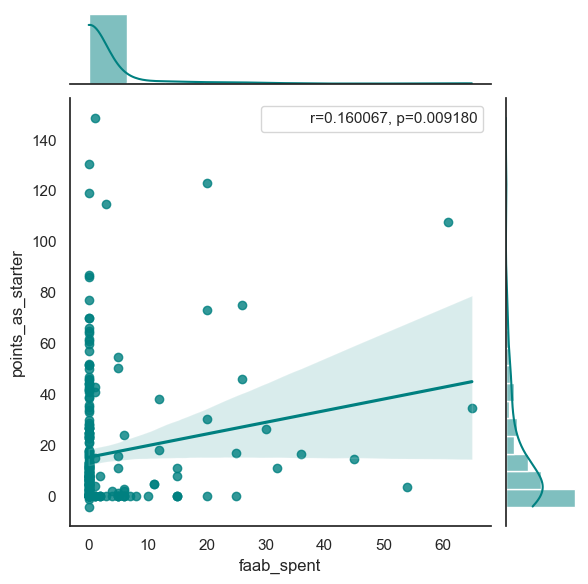

In [36]:
import scipy.stats as stats

sns.set_theme(style = "white")

graph = sns.jointplot(data = waiver_wire_df.loc[waiver_wire_df.faab_spent > -1], x = "faab_spent", y = "points_as_starter", kind = "reg", color = 'teal')
r, p = stats.pearsonr(waiver_wire_df.loc[waiver_wire_df.faab_spent > -1].faab_spent, waiver_wire_df.loc[waiver_wire_df.faab_spent > -1].points_as_starter)

phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method

graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

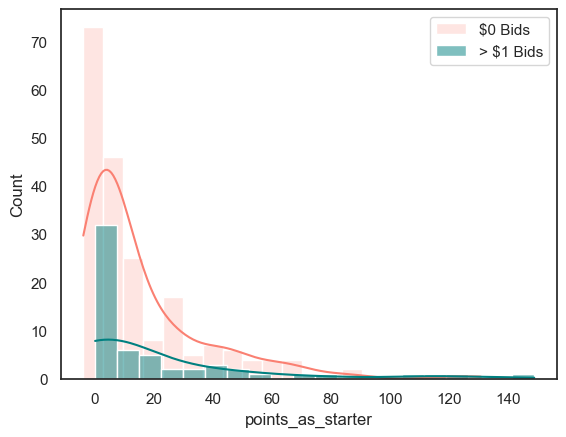

In [30]:
# What if we check the distributions of 0 dollar bids vs <1 dollar bids
sns.histplot(data=waiver_wire_df.loc[waiver_wire_df.faab_spent == 0], x="points_as_starter", color="salmon", alpha = 0.2, label="$0 Bids", kde=True, stat = 'count', bins = 20)

sns.histplot(data=waiver_wire_df.loc[waiver_wire_df.faab_spent > 0], x="points_as_starter", color="teal", label="> $1 Bids", kde=True, stat = 'count', bins = 20)

plt.legend() 
plt.show()

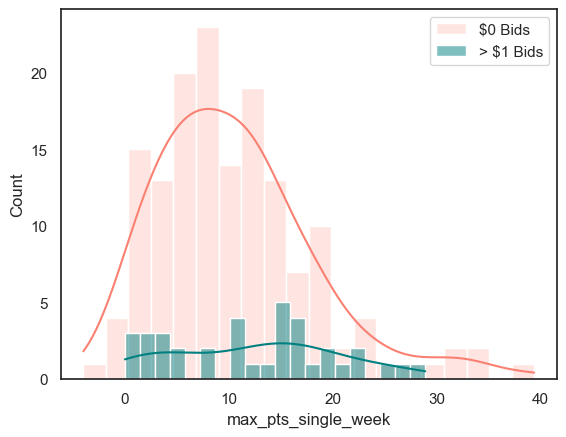

In [31]:
# What if we check the distributions of 0 dollar bids vs <1 dollar bids
sns.histplot(data=waiver_wire_df.loc[waiver_wire_df.faab_spent == 0], x="max_pts_single_week", color="salmon", alpha = 0.2, label="$0 Bids", kde=True, stat = 'count', bins = 20)

sns.histplot(data=waiver_wire_df.loc[waiver_wire_df.faab_spent > 0], x="max_pts_single_week", color="teal", label="> $1 Bids", kde=True, stat = 'count', bins = 20)

plt.legend() 
plt.show()

Ha, so that's pretty interesting. So clearly we have a larger sample size for the \\$0 bids, but it looks like using the "total points as starter" metric, the distributions look very similar (exponential with a long tail). However, the distributions using the 'maximum points in a single starting week" metric, we have an apparent difference. The \\$1 or more bids tend to be pretty uniform between 0 and ~26 pts, but the \\$0 bid players tend to be almost a skewed normal distribution with a much longer tail.

The interpretation of this difference is that this year, you were more likely to win your week thanks to a \\$0 pickup than you were with a high dollar waiver wire add

## Waiver Wire - Highest Failed Bid

In [32]:
failed_bids_df = pd.read_csv("../data/processed/failed_bids.csv", index_col=0)
failed_bids_df[:5]

,adds,consenter_ids,created,creator,draft_picks,drops,roster_ids,settings,status,status_updated,transaction_id,type,waiver_budget,leg,metadata,adds_named,drops_named,faab_spent
206,{'5347': 8},[8],1667351361214,jakesmyth,[],{'5000': 8},[8],"TransactionSettings(seq=1, waiver_bid=54)",TransactionStatus.FAILED,1667372708116,893339993534345216,TransactionType.WAIVER,[],8,{'notes': 'This player was claimed by another ...,{'Nyheim Hines': 'jakesmyth'},{'Chase Edmonds': 'jakesmyth'},54
13,{'5284': 4},[4],1663060415027,andyhan4,[],{'2431': 4},[4],"TransactionSettings(seq=2, waiver_bid=20)",TransactionStatus.FAILED,1663139073941,875342460778393600,TransactionType.WAIVER,[],1,{'notes': 'This player was claimed by another ...,{'Jeff Wilson': 'andyhan4'},{'Mike Davis': 'andyhan4'},20
153,{'7607': 4},[4],1666708375222,andyhan4,[],{'3161': 4},[4],"TransactionSettings(seq=1, waiver_bid=15)",TransactionStatus.FAILED,1666767889503,890643114816151552,TransactionType.WAIVER,[],7,{'notes': 'This player was claimed by another ...,{'Michael Carter': 'andyhan4'},{'Carson Wentz': 'andyhan4'},15
5,{'5284': 1},[1],1663114252848,carlogesualdo,[],{'8138': 1},[1],"TransactionSettings(seq=3, waiver_bid=14)",TransactionStatus.FAILED,1663139073941,875568272966397952,TransactionType.WAIVER,[],1,{'notes': 'This player was claimed by another ...,{'Jeff Wilson': 'carlogesualdo'},{'James Cook': 'carlogesualdo'},14
151,{'7607': 14},[14],1666711093630,mattlatham,[],NaN,[14],"TransactionSettings(seq=2, waiver_bid=11)",TransactionStatus.FAILED,1666767889503,890654516645732352,TransactionType.WAIVER,[],7,{'notes': 'This player was claimed by another ...,{'Michael Carter': 'mattlatham'},NaN,11


So, with the exception of Jakesmyth who outbid himself (...), the highest unsuccessful bid was made by Andy who tried to get Jeff Wilson for 20 bucks before week 2, but would ultimately be outbit by Matt who spent \\$50 to get the backup RB

# Trades

So there were only two trades this year. The first trade was between Jake and Nicole and gets the prize for being the most balanced trade:

Nicole Received Jerry Jeudy, Darrell Henderson, and Dak Prescott 
Jake Received Aaron Rodgers, James Robinson, and Chase Claypool

Over the rest of the season, Jake got 23.68 points from these players while Nicole got 30.04. So while Nicole came out ahead, it was pretty close

The next trade was between Jake and Eric and gets the prize for being the LEAST balanced trade
Jake Received James Conner and Curtis Samuel
Eric Received Justin Herbert and Chris Godwin

Jake got 62.60 points from these starters
Eric got 97.74 points from these starters

Eric came out ahead, having gotten more starts and more points from these players

# Management

Now for the overall superlatives

In [33]:
manager_efficiencies = pd.read_csv("../data/processed/manager_efficiencies.csv", index_col = 0)
manager_efficiencies

,points,maximum_possible_points,percent_possible
petenotpetey,1591.06,1712.46,0.929108
julesdefwatchesftbll,1292.52,1395.08,0.926485
carlogesualdo,1479.88,1607.40,0.920667
mattlatham,1295.70,1413.20,0.916855
ujthechamp,1424.66,1559.44,0.913572
lauramarkey,1573.98,1729.10,0.910289
emilyhan,1322.66,1463.04,0.904049
alexludtke,1290.44,1430.06,0.902368
niclath95,1393.34,1551.70,0.897944
jakesmyth,1266.72,1420.32,0.891855


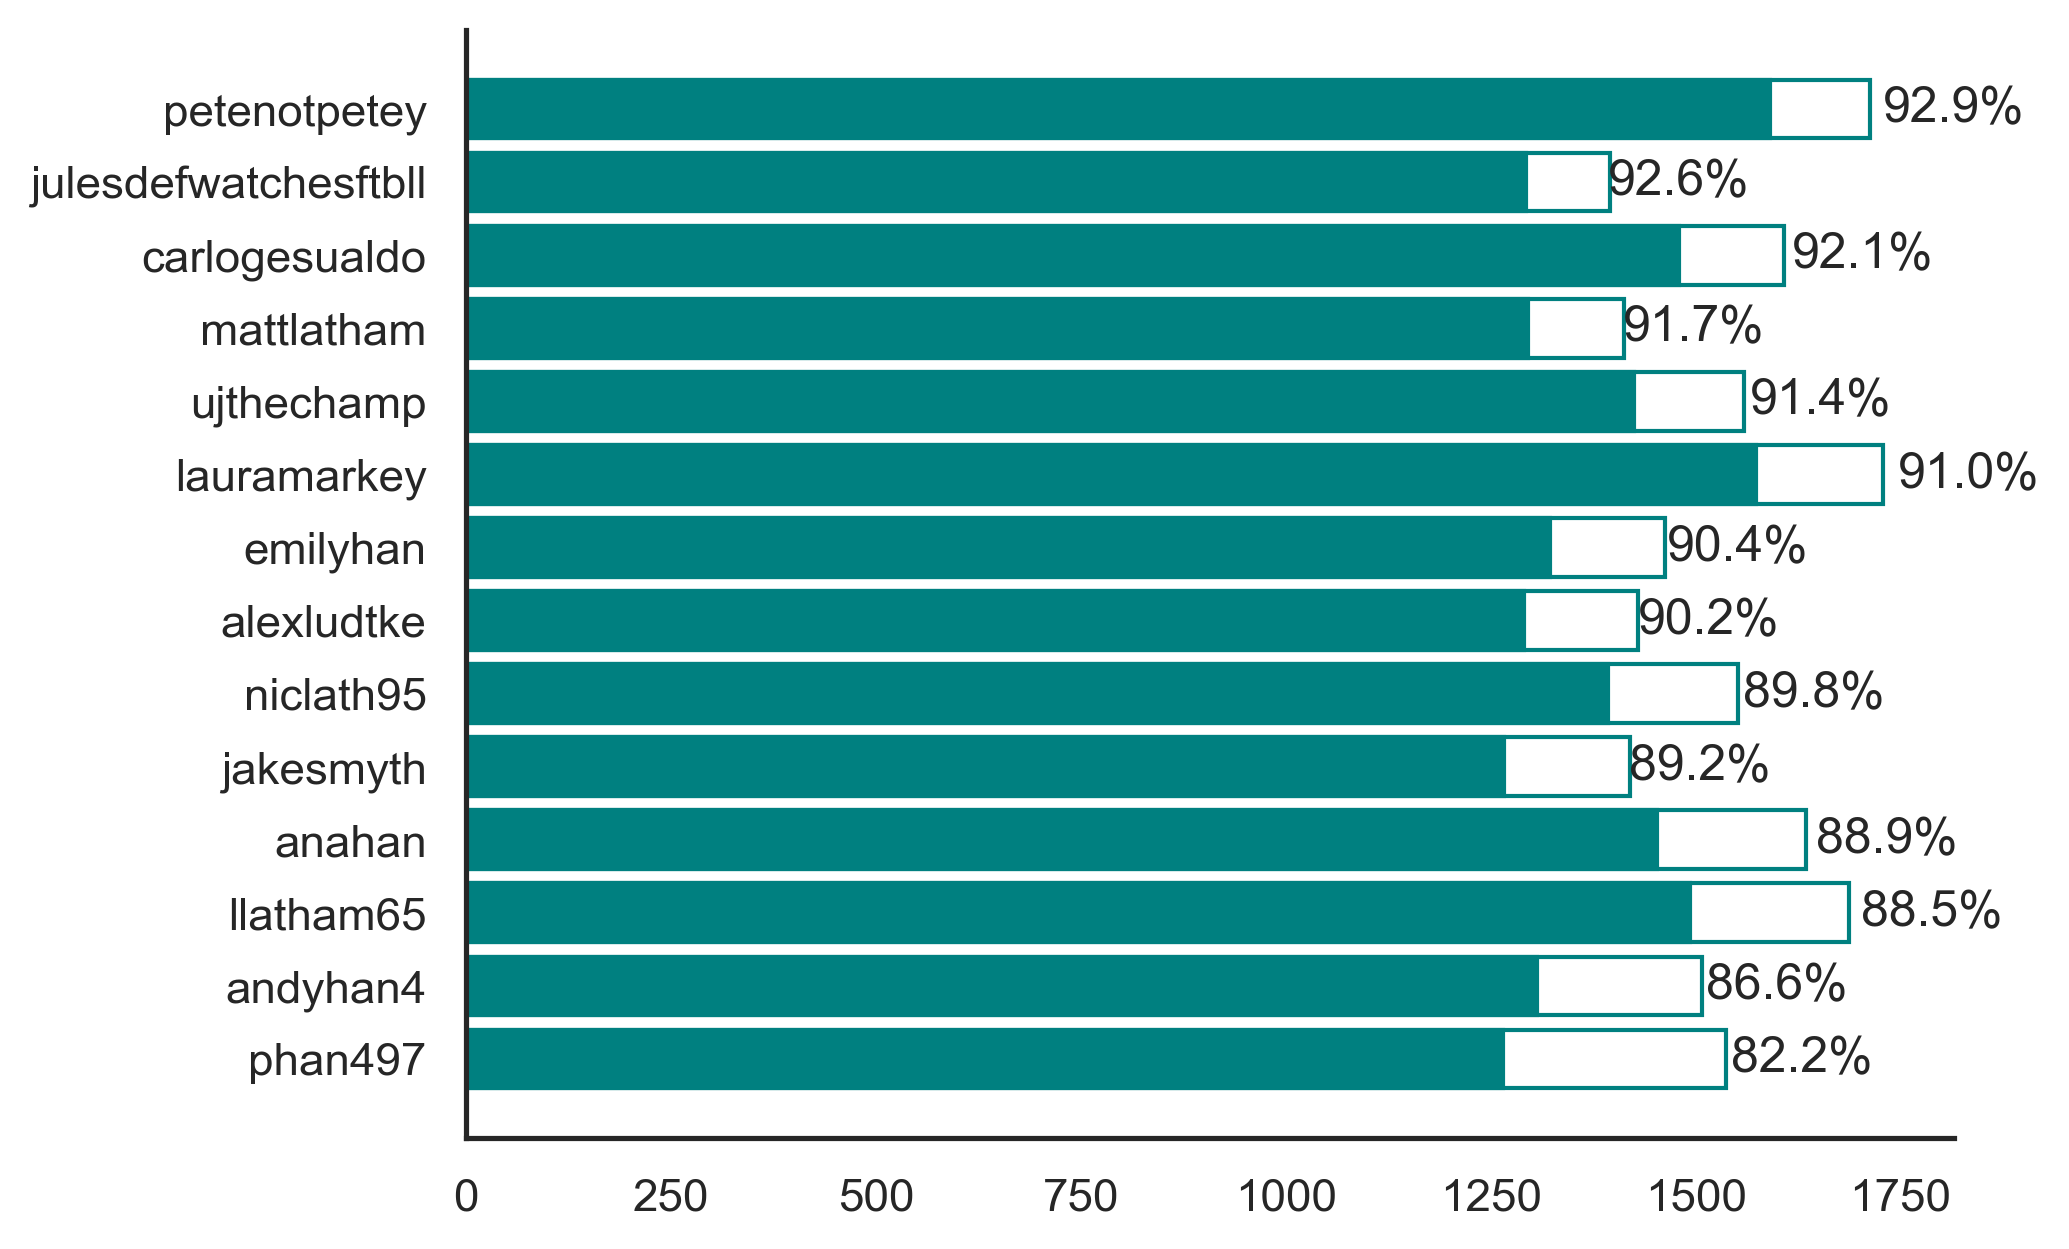

In [35]:
total_points = manager_efficiencies.sort_values(by = "percent_possible")['points'].values
possible_points = manager_efficiencies.sort_values(by = "percent_possible")['maximum_possible_points'].values
percent = 100*manager_efficiencies.sort_values(by = "percent_possible")["percent_possible"].values
percent = [str(x) + "%" for x in percent.round(1)]
managers = list(manager_efficiencies.sort_values(by = "percent_possible").index.to_list())

fig = plt.figure(dpi=300)
ax = plt.gca()
bar1 = ax.barh(managers, possible_points, height = 0.8, color = 'white', label = "Maximum Possible Points",
        edgecolor='teal')

bar2 = ax.barh(managers, total_points, height = 0.8, color = 'teal', label = "Points Scored",
        edgecolor='teal')

def label_bars(rects, text):
    for i, rect in enumerate(rects):
        width = rect.get_width()
        plt.text(1.06*rect.get_width(), rect.get_y()+0.5*rect.get_height(),
                 text[i], ha='center', va='center')
        
label_bars(bar1, percent)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [64]:
cade_performance_df = pd.read_csv("../data/processed/cade_crypto_performance_df.csv", index_col = 0) # has win totals
manager_efficiencies["wins"] = [cade_performance_df[x].to_list().count(1) for x in manager_efficiencies.index]
manager_efficiencies["losses"] =[cade_performance_df[x].to_list().count(-1) for x in manager_efficiencies.index]


manager_efficiencies['pts_per_win'] = manager_efficiencies.points / manager_efficiencies.wins
manager_efficiencies.sort_values(by = "pts_per_win")

,points,maximum_possible_points,percent_possible,losses,wins,pts_per_win
petenotpetey,1591.06,1712.46,0.929108,2,12,132.588333
lauramarkey,1573.98,1729.10,0.910289,3,11,143.089091
ujthechamp,1424.66,1559.44,0.913572,5,9,158.295556
jakesmyth,1266.72,1420.32,0.891855,6,8,158.340000
alexludtke,1290.44,1430.06,0.902368,7,7,184.348571
carlogesualdo,1479.88,1607.40,0.920667,6,8,184.985000
llatham65,1492.98,1686.88,0.885054,6,8,186.622500
anahan,1453.50,1635.12,0.888926,7,7,207.642857
mattlatham,1295.70,1413.20,0.916855,8,6,215.950000
emilyhan,1322.66,1463.04,0.904049,8,6,220.443333
